# Exercício semana 13 - Igea Martins

**O dataset 'shopping_trends_updates.csv'** é um dataset sintético para estudos em data science e análise de dados. Ele correlaciona dados a respeito de consumidores no âmbito do varejo como itens de vestuário comprados, gênero e idade, valor das compras, aspectos físicos da peça comprada, estado americano onde a compra ocorreu e o tipo da peça. A ideia é identificar padrões e vieses no consumo de cada grupo isolado utilizando as libs pandas e matplotlib:

In [1]:
#Dataframe original

import pandas as pd, matplotlib.pyplot as plt

df = pd.read_csv("shopping_trends_updated.csv")

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


Aqui avaliei a natureza do dataset, a presença de dados categóricos e numéricos, uma primeira avaliação. Já nesse momento percebi que poderia enquadrar algumas tendências de consumo a partir das colunas de idade, gênero, valores gastos nas compras e temporada sabendo que são dados mais sensíveis à variação do mercado de moda.

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


Ao visualizar as métricas utilizando a função describe, avaliei os dados numéricos a partir do desvio-padrão e dos quartis em relação à média pra pensar em quais correlações podem ser interessantes de visualizar graficamente.

In [3]:
dfFiltrado = df[(df['Age'] > 30) & (df['Age'] < 40) & (df['Gender'] == 'Female')]
dfFiltrado.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,214.0,3259.271028,357.176370,2660.0,2935.50,3264.5,3577.500,3893.0
Age,214.0,34.925234,2.689576,31.0,33.00,35.0,37.000,39.0
Purchase Amount (USD),214.0,59.168224,22.867032,21.0,40.25,56.5,79.750,100.0
Review Rating,214.0,3.759346,0.714361,2.5,3.20,3.8,4.375,5.0
Previous Purchases,214.0,23.967290,14.257651,1.0,12.00,22.5,36.750,49.0


Realizo um filtro limitando as linhas a apenas consumidoras com idades entre 30 e 40 anos, faixa etária à qual pertenço, pra a partir disso tentar identificar tendências manifestadas tanto em valor de compra quanto nos dados categóricos (por exemplo, se houve uma preferência geral dessa faixa etária por comprar roupas de uma determinada estação).

In [4]:
dfLoc = dfFiltrado.loc[:, ["Customer ID", "Age", "Season"]]
dfLoc

,Customer ID,Age,Season
2659,2660,35,Summer
2669,2670,39,Spring
2671,2672,37,Winter
2678,2679,33,Spring
2707,2708,32,Fall
...,...,...,...
3883,3884,34,Fall
3886,3887,37,Summer
3890,3891,35,Winter
3891,3892,36,Winter


Crio um subset correlacionando apenas as colunas de ID, idade e temporada.

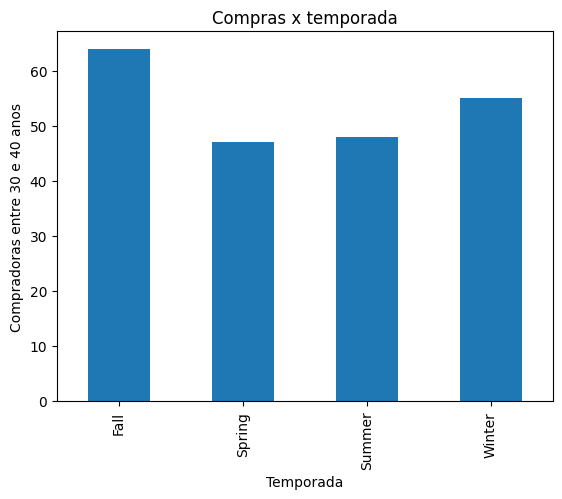

In [5]:
dadoAgrupado = dfLoc.groupby('Season')
contagemConsumidoras = dadoAgrupado['Customer ID'].count()
contagemConsumidoras.plot(kind='bar');

plt.xlabel('Temporada')
plt.ylabel('Compradoras entre 30 e 40 anos')
plt.title('Compras x temporada')
plt.show()

Agrupo os dados por temporada, conto os IDs e ploto um gráfico de barras mostrando a variação de compras realizadas por estação.
***Insights e perguntas***
- As compradoras dessa faixa etária preferiram comprar progressivamente itens de Primavera > Verão > Inverno > Outono.
- Os gastos maiores em itens da temporada de Outono/Inverno, maiores no outono, dizem respeito aos descontos maiores dessa temporada em relação a primavera/verão?
- Existe uma relação entre o clima do local já que os EUA tem uma grande variação de clima?
- As compradoras, em relação às outras faixas etárias, preferiram realizar compras mais direcionadas à necessidade de proteção dos itens de Outono/Inverno?

In [6]:
dfFiltrado2 = dfFiltrado.loc[:, ["Age", "Purchase Amount (USD)"]]
dfFiltrado2

,Age,Purchase Amount (USD)
2659,35,35
2669,39,28
2671,37,64
2678,33,91
2707,32,88
...,...,...
3883,34,38
3886,37,92
3890,35,81
3891,36,30


Aqui, crio um novo subset correlacionando Idade e valores por compra desta mesma faixa etária, pra tentar compreender a distribuição de valores por idade.

In [7]:
dfFiltrado2 = dfFiltrado2.sort_values(by='Age')
dfFiltrado2

,Age,Purchase Amount (USD)
3289,31,50
3050,31,76
3502,31,62
3709,31,43
3503,31,96
...,...,...
3633,39,51
2890,39,55
2834,39,43
3008,39,86


Realizo um sort por idade

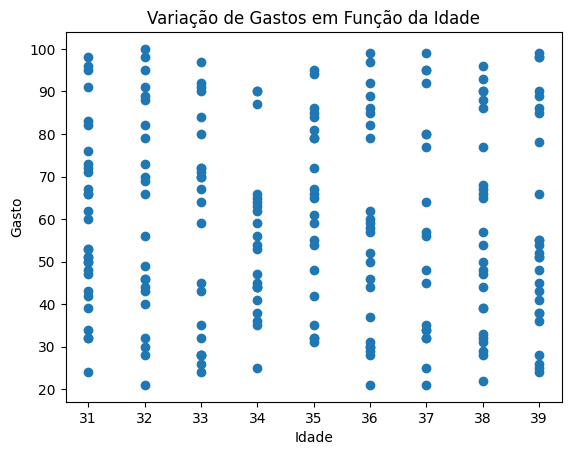

In [8]:
plt.scatter(dfFiltrado2['Age'], dfFiltrado2['Purchase Amount (USD)'])
plt.xlabel('Idade')
plt.ylabel('Gasto')
plt.title('Variação de Gastos em Função da Idade')

plt.show()

e ploto um scatter pra visualizar essa distribuição. 
***Insights e perguntas:***
- Compradoras entre 31 e 33 anos realizam compras de valores mais distribuídos, enquanto as compradoras entre 34 e 39 anos realizam compras num geral mais baratas.
- As compradoras entre 34 e 39 anos concentram rendas mais baixas talvez, ou se interessam mais em economizar?
- A partir dos 34 anos existe alguma mudança objetiva ou subjetiva na vida das consumidoras que se reflete na maior concentração de compras mais baratas e no seu menor volume?